<a href="https://colab.research.google.com/github/SophistryDude/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Nick_M's_Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import random
import math
sales = np.array([3505,
                  2400,
                  3027,
                  2798,
                  3700,
                  3250,
                  2689])
var_data = {'Sales': sales}
var_df = pd.DataFrame(var_data)
var_df['zeros'] = pd.Series(list(np.zeros(6)))

var_df


,Sales,zeros
0,3505,0.0
1,2400,0.0
2,3027,0.0
3,2798,0.0
4,3700,0.0
5,3250,0.0
6,2689,NaN


In [27]:
mean = var_df['Sales'].mean()
print("Mean:", mean)
n = len(var_df.index)
var_df['Variance'] = var_df['Sales'] - mean

print("Variance:", var_df['Sales'].var())


Mean: 3052.714285714286
Variance: 214387.90476190473


In [28]:
var_df['v^2'] = var_df['Variance']**2

var_df

,Sales,zeros,Variance,v^2
0,3505,0.0,452.285714,204562.367347
1,2400,0.0,-652.714286,426035.938776
2,3027,0.0,-25.714286,661.224490
3,2798,0.0,-254.714286,64879.367347
4,3700,0.0,647.285714,418978.795918
5,3250,0.0,197.285714,38921.653061
6,2689,NaN,-363.714286,132288.081633


In [29]:
print(var_df['Variance'].std())

463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [30]:
cust = np.array([127,
                 80,
                 105,
                 92,
                 120,
                 115,
                 93])
cust_sale = {'Customers': cust, 'Sales': sales}
df2 = pd.DataFrame(cust_sale)
df2['zeros'] = pd.Series(list(np.zeros(n)))
df2

,Customers,Sales,zeros
0,127,3505,0.0
1,80,2400,0.0
2,105,3027,0.0
3,92,2798,0.0
4,120,3700,0.0
5,115,3250,0.0
6,93,2689,0.0


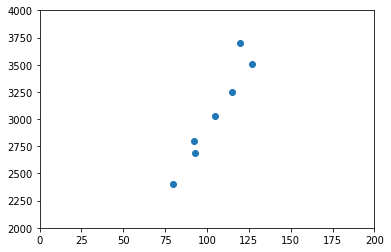

In [31]:
plt.scatter(df2.Customers, df2.Sales)
plt.xlim(0, 200)
plt.ylim(2000, 4000)
plt.show()

In [32]:
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)
correlation = cov(df2['Sales'], df2['Customers'])
correlation

7604.357142857142

In [33]:
#correlation.corr()

It seems that the correlation between the number of customers and the rate of sales is approx 96%. This is a very strong correlation.

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [34]:
print(df2['Sales'].std())
print(df2['Customers'].std())

463.0204150595357
17.057326313123664


In [35]:
#var_df['v'] = var_df['Sales'] - mean





## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [36]:
!wget "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
column_headers = ["pclass","survived","name","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest","has_cabin_number"]
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', names = column_headers)

--2020-08-20 05:42:08--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv.1’

titanic_clean.csv.1 100%[===================>] 134.29K  --.-KB/s    in 0.04s   

2020-08-20 05:42:09 (3.24 MB/s) - ‘titanic_clean.csv.1’ saved [137509/137509]



In [37]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
NaN,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1.0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2.0,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3.0,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4.0,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON",1


In [38]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1306.0,3,0,"Zabour, Miss. Thamine",female,29.8811345124283,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1307.0,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304,NaN,0
1308.0,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,NaN,C,NaN,NaN,NaN,0
1309.0,3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,7.875,NaN,S,NaN,NaN,NaN,0
1310.0,NaN,NaN,NaN,NaN,29.8811345124283,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,0


In [39]:
titanic = titanic.drop(["name", "sex", "ticket", "cabin", "embarked", "boat", "body", "home.dest", "has_cabin_number"], axis=1)
titanic.head()

,pclass,survived,age,sibsp,parch,fare
NaN,pclass,survived,age,sibsp,parch,fare
1.0,1,1,29,0,0,211.3375
2.0,1,1,0.9167,1,2,151.55
3.0,1,0,2,1,2,151.55
4.0,1,0,30,1,2,151.55


In [40]:
titanic = titanic.drop(["pclass", "survived", "sibsp", "parch"], axis=1)
titanic.head()

,age,fare
NaN,age,fare
1.0,29,211.3375
2.0,0.9167,151.55
3.0,2,151.55
4.0,30,151.55


In [42]:
titanic = titanic.dropna()
titanic = titanic.astype(float).astype(int)
titanic['zeros'] = pd.Series(list(np.zeros(1309)))
titanic.head()

,age,fare,zeros
NaN,age,fare,NaN
1.0,29,211.3375,0.0
2.0,0.9167,151.55,0.0
3.0,2,151.55,0.0
4.0,30,151.55,0.0


In [44]:
#var_df['v^2'] = var_df['Variance']**2

mean_age = titanic['age'].mean()
mean_fare = titanic['fare'].mean()
titanic['Age_Var'] = titanic['age'] - mean_age
titanic['Fare_Var'] = titanic['fare'] - mean_fare
age_var_sq = titanic['Age_Var']**2
fare_var_sq = titanic['Fare_Var']**2
print("Average Age:", mean_age)
print("Average Fare Price:", mean_fare)
titanic.head()


ValueError: ignored

In [ ]:
print("Age Variance Squared:", age_var_sq)
print("Fare Variance Squared:", fare_var_sq)

In [ ]:
plt.scatter(titanic.age, titanic.fare)
plt.xlim(0, 110)
plt.ylim(0,300)
plt.show()

In [ ]:
titanic.cov()

In [ ]:
titanic.corr()

# Orthogonality


## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
# when y1=mx and y2=-mx they are orthogonal. Orthogonal means perpendicular. 
vec1 = np.array([0,2])
vec2 = np.array([2,0])

plt.arrow(0,0, vec1[0], vec1[1], head_width=.03, head_length=.03, color='purple')
plt.arrow(0,0, vec2[0], vec2[1], head_width=.05, head_length=.05, color='g')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("Perpendicular")
plt.show()

In [ ]:
# Also, we can use the dot product to determine if orthogonal. The dot product will be 0
(vec1*vec2).sum()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
# These vectors are not orthogonal. Orthogonal vectors will be perpendicular to each other. 
vector_a = np.array([-5,
                     3,
                     7])
vector_b = np.array([6,
                     -8,
                     2])
plt.arrow(0,0, vector_a[0], vector_a[1], head_width=.03, head_length=.03, color='purple')
plt.arrow(0,0, vector_b[0], vector_b[1], head_width=.05, head_length=.05, color='g')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("Perpendicular")
plt.show()

In [ ]:
#Since the dot product is not 0, we can determine that this is not orthogonal two ways. 
(vector_a*vector_b).sum()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
#They're all positive integers
c = np.array([2, -15, 6, 20])
c_t = pd.DataFrame([2, -15, 6, 20])
c2 = c_t.T*c
print("Magnitude:", np.linalg.norm(c))
print("Dot Product:", (c*c).sum())
print(c2)

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:



\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2i + 3j
\qquad \end{align}
\begin{align} e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} + -8 \begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix} \end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [45]:
#Finding the norm
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f).sum() 
f_vector = f/f_norm
f_vector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

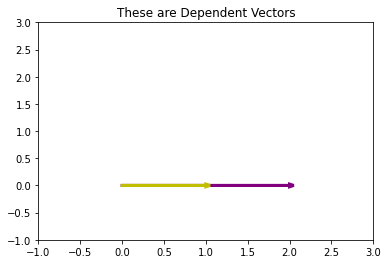

In [49]:
# Linearly Dependent Vectors
v = [1,0]
v2 = np.multiply(2,v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='y', linewidth=0.5)
plt.arrow(0,0,v2[0],v2[1],linewidth=3,head_width=.05,head_length=.05,color='purple')
plt.arrow(0,0,v[0],v[1], linewidth=3, head_width=.05, head_length=.05, color='y')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("These are Dependent Vectors")
plt.show()

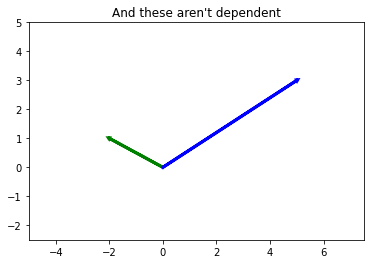

In [54]:
#Independent
g = [-2, 1]
b = [5,3]
plt.arrow(0,0,g[0],g[1], linewidth=3, head_width=.04, head_length=.04, color='g')
plt.arrow(0,0,b[0],b[1], linewidth=3, head_width=.04, head_length=.04, color='b')
plt.xlim(-5,7.5)
plt.ylim(-2.5,5)
plt.title("And these aren't dependent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [60]:
g = np.array([1,2])
h = np.array([4,8])
span = h[1]- g[0]
print("Span:",span)

Span: 7


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

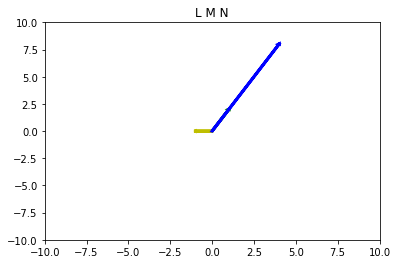

In [56]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

plt.arrow(0,0,l[0],l[1], linewidth=3, head_width=.04, head_length=.04, color='g')
plt.arrow(0,0,m[0],m[1], linewidth=3, head_width=.04, head_length=.04, color='y')
plt.arrow(0,0,n[0],n[1], linewidth=3, head_width=.04, head_length=.04, color='b')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("L M N")
plt.show()

In [59]:
r2 = 8-(-1)
print("Span:",r2)

Span: 9


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



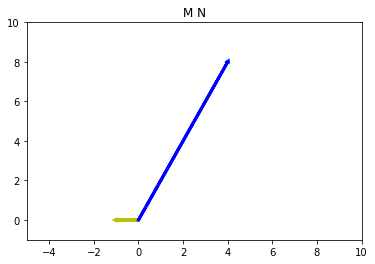

In [63]:
m = np.array([-1,0,7])
n = np.array([4,8,2])

plt.arrow(0,0,m[0],m[1], linewidth=3, head_width=.04, head_length=.04, color='y')
plt.arrow(0,0,n[0],n[1], linewidth=3, head_width=.04, head_length=.04, color='b')
plt.xlim(-5,10)
plt.ylim(-1,10)
plt.title("M N")
plt.show()

## 6.2 What does it mean to form a basis?

forming a basis means that you combine two independent vectors. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## The rank of P is 8

## 7.2 What does the rank of a matrix tell us?

the number of independent variables that make up a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()